In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

In [3]:
url = "data/nhanes_2015_2016.csv"
df = pd.read_csv(url)
df

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


### Studying Discrete Values

In [4]:
gender = df["RIAGENDR"]
gender.value_counts()

RIAGENDR
2    2976
1    2759
Name: count, dtype: int64

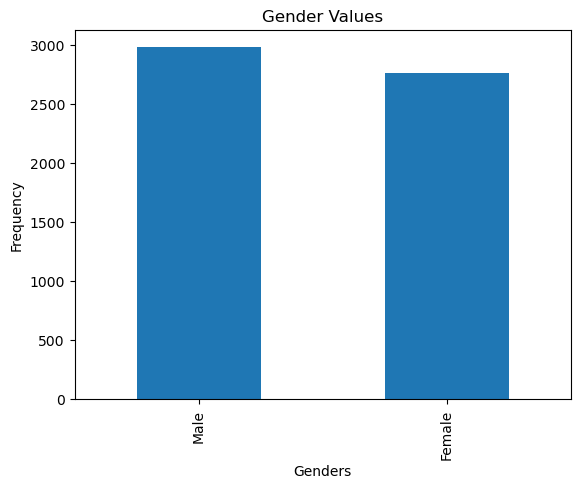

In [5]:
gender.value_counts().plot(kind="bar")
plt.title("Gender Values")
plt.xlabel("Genders")
plt.xticks([0, 1], ["Male", "Female"])
plt.ylabel("Frequency")
plt.show()

### Most Common Value: Short Example

In [6]:
sizes = np.array([22, 23, 29, 32, 29, 42, 42, 42, 42, 42, 42, 42, 42, 43, 44, 46, 51, 51, 55, 55, 57, 58, 78, 83, 97, 97])

print(sizes)
print("Mean: ", sizes.mean())

[22 23 29 32 29 42 42 42 42 42 42 42 42 43 44 46 51 51 55 55 57 58 78 83
 97 97]
Mean:  49.46153846153846


In [7]:
from collections import Counter

cnt = Counter()
for size in sizes:
  cnt[size]+=1
cnt.most_common()

[(42, 8),
 (29, 2),
 (51, 2),
 (55, 2),
 (97, 2),
 (22, 1),
 (23, 1),
 (32, 1),
 (43, 1),
 (44, 1),
 (46, 1),
 (57, 1),
 (58, 1),
 (78, 1),
 (83, 1)]

### More than One "Classes"

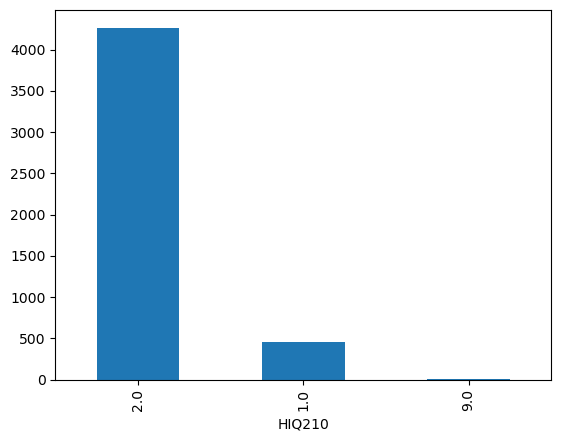

In [8]:
counts = df['HIQ210']
counts.value_counts().plot(kind="bar")
plt.show()

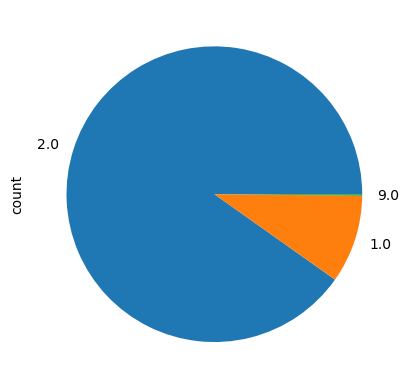

In [9]:
counts.value_counts().plot(kind='pie')
plt.show()

### Studying Real-Valued Numbers

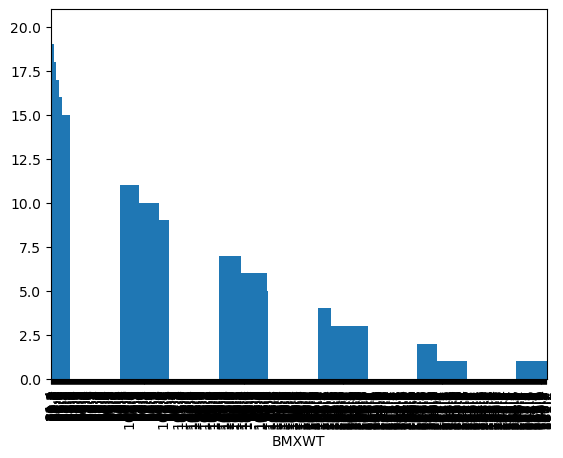

In [10]:
weights = df["BMXWT"]
weights.value_counts().plot(kind='bar')

plt.show()

### Measure of Central Tendency
Checkout the center (most frequency), and how many people are close to the it and how many people are away from it.

**Histograms:** Create Two Value Ranges (2 BINS), by '0 to mid', by 'mid to end' of Lowest to Highest Values.


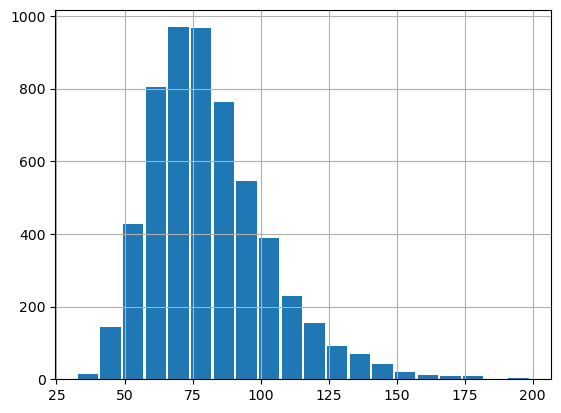

In [11]:
weights.hist(bins=20, rwidth=.9)
plt.show()

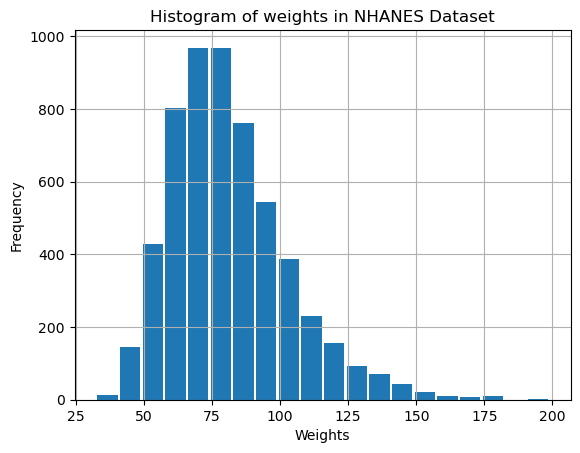

In [12]:
plt.hist(weights, bins=20, rwidth=.9)
plt.ylabel("Frequency")
plt.xlabel("Weights")
plt.title("Histogram of weights in NHANES Dataset")

plt.grid()

plt.show()

In [13]:
import seaborn as sns
sns.set(color_codes=True)
sns.set_style("white")

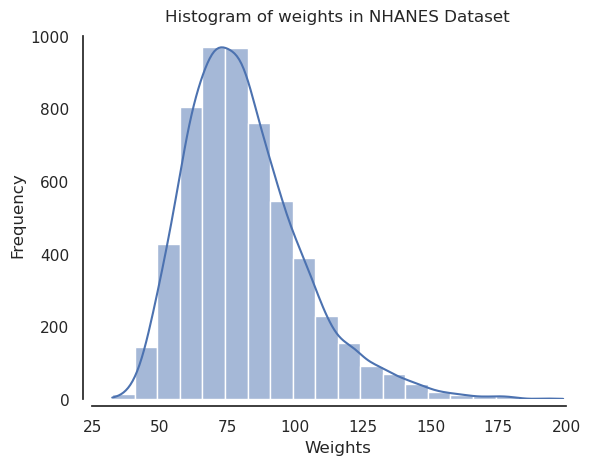

In [14]:
sns.histplot(weights, bins=20, kde=True)

plt.ylabel("Frequency")
plt.xlabel("Weights")
plt.title("Histogram of weights in NHANES Dataset")

sns.despine(offset=5, trim=True) # offset the x and y axis

plt.show()

### Studying Central Tendency

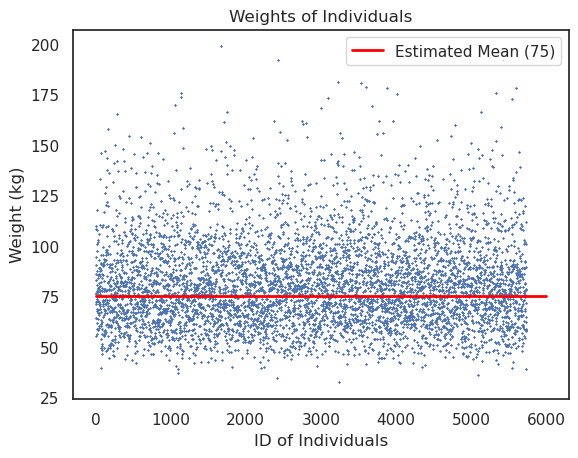

In [15]:
x = range(df["BMXWT"].size)
y = df['BMXWT']

plt.scatter(x, y, marker='x', s=0.5)

plt.title("Weights of Individuals")
plt.xlabel("ID of Individuals")
plt.ylabel("Weight (kg)")

# plot the estimate line, estimated mean (by looking is at 75)
plt.plot((0,6000), (75, 75), color='red', linewidth=2, label="Estimated Mean (75)") # x will go from 0 to 6000, and y will go from 75 to 75, remains the same

plt.legend()
plt.show()

In [16]:
# we estimated mean 75, actual arithmetic mean is
weights.mean() # 81.34267560889516

81.34267560889516

#### Plotting the estimated mean, and actual arithmetic mean.

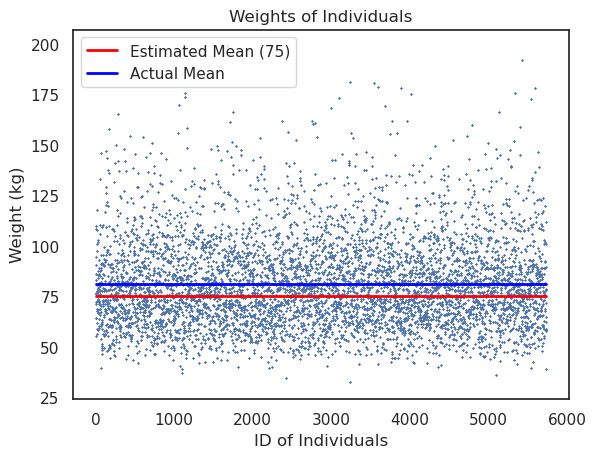

In [17]:
# plt.figure(figsize=(20, 5))

x = range(df["BMXWT"].size)
y = df['BMXWT']

plt.scatter(x, y, marker='x', s=0.5)

plt.title("Weights of Individuals")
plt.xlabel("ID of Individuals")
plt.ylabel("Weight (kg)")

# plot the estimate line, ESTIMATED MEAN (by looking is at 75)

# x goes from 0 to last value of x_range
plt.plot((0,x[-1]), (75, 75), color='red', linewidth=2, label="Estimated Mean (75)") # x will go from 0 to 6000, and y will go from 75 to 75, remains the same

# ACTUAL ARITHMETIC MEAN

# x goes from 0 to last value of x_range
plt.plot((0,x[-1]), (weights.mean(),weights.mean()), color='blue', linewidth=2, label="Actual Mean") # x will go from 0 to 6000, and y will go from MEAN to MEAN, remains the same

plt.legend()
plt.show()

### Problem with Arithmetic Mean

The also include the outliers. Outliers mean that there are only some elements relative to the other datasets, that are manipulating the mean way too much.

This Problem is solved by **MEDIANS**, they exclude the outliers. Median is calculated by getting the mid two values, and getting the average of those two elements.

In [18]:
nums = np.array([3, 4, 9, 17, 18, 20, 22, 23, 29, 32, 39, 42, 42, 42, 51, 97])

In [19]:
print("Mean: ", np.mean(nums))
print("Median: ", np.median(nums))

Mean:  30.625
Median:  26.0


If we update or add the outlier, Mean will change the median will not.

In [20]:
nums[-1] += 100

print("Mean: ", np.mean(nums))
print("Median: ", np.median(nums))

Mean:  36.875
Median:  26.0


### Visualizing the Weights

Here is the same problem as above, there are outliers in our dataset.

In [21]:
print("Min: ", weights.min())
print("Max: ", weights.max())
print("Median: ", weights.median())

Min:  32.4
Max:  198.9
Median:  78.2


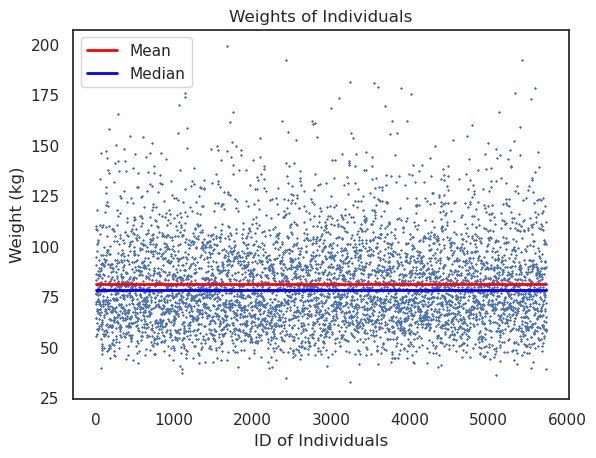

In [22]:
# plt.figure(figsize=(20, 5))

x = range(df["BMXWT"].size)
y = df['BMXWT']

plt.scatter(x, y, marker='x', s=0.5)

plt.title("Weights of Individuals")
plt.xlabel("ID of Individuals")
plt.ylabel("Weight (kg)")

# ARITHMETIC MEAN
plt.plot((0,x[-1]), (weights.mean(),weights.mean()), color='red', linewidth=2, label="Mean") # x goes from 0 to last value of x_range, and y will go from MEAN to MEAN, remains the same

# MEDIAN
plt.plot((0,x[-1]), (weights.median(), weights.median()), color='blue', linewidth=2, label="Median") # x goes from 0 to last value of x_range, and y will go from MEDIAN to MEDIAN, remains the same

plt.legend()
plt.show()

### Quartiles and Boxplots

Quartiles are values that divide a dataset into four equal parts. They are a type of quantile and are used to understand the distribution of data. There are three main quartiles:

1. **First Quartile (Q1)**: The median of the lower half of the dataset (25th percentile).
2. **Second Quartile (Q2)**: The median of the dataset (50th percentile).
3. **Third Quartile (Q3)**: The median of the upper half of the dataset (75th percentile).

#### Steps to Calculate Quartiles

1. **Order the data**: Arrange the data in ascending order.
2. **Find the median (Q2)**: The middle value of the dataset. If the dataset has an odd number of observations, the median is the middle number. If the dataset has an even number of observations, the median is the average of the two middle numbers.
3. **Calculate Q1**: Find the median of the lower half of the dataset (not including Q2 if the number of observations is odd).
4. **Calculate Q3**: Find the median of the upper half of the dataset (not including Q2 if the number of observations is odd).

#### Example

Consider the dataset: 6, 7, 15, 36, 39, 40, 41, 42, 43, 47, 49.

1. **Order the data**: The dataset is already in ascending order.
2. **Find the median (Q2)**:
   - There are 11 observations, so Q2 is the 6th value: 40.
3. **Calculate Q1**:
   - The lower half is: 6, 7, 15, 36, 39.
   - The median of the lower half is: 15.
4. **Calculate Q3**:
   - The upper half is: 41, 42, 43, 47, 49.
   - The median of the upper half is: 43.

Thus, the quartiles are:
- Q1 = 15
- Q2 = 40
- Q3 = 43


In [23]:
nums = np.array([3, 4, 9, 17, 18, 20, 22, 23, 29, 32, 39, 42, 42, 42, 51, 97])

print("Median: ", np.median(nums))

Median:  26.0


In [24]:
# creating the 4 quantiles (quartiles)
statistics.quantiles(nums, n=4)

[17.25, 26.0, 42.0]

In [25]:
statistics.quantiles(weights, n=4)

[43.7, 52.5, 50.1]

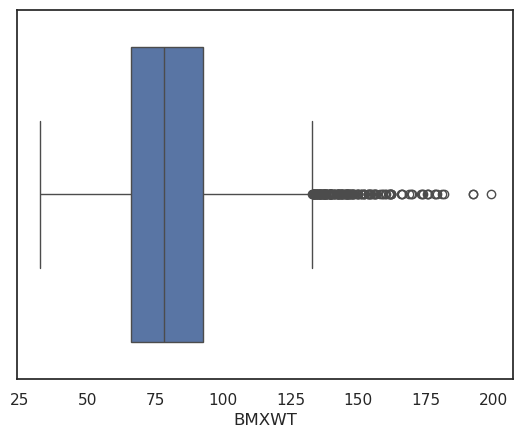

In [26]:
# sns will automatically detect the outliers
ax = sns.boxplot(x=weights)

In [27]:
# from genders locate the select only males (i.e. 2), and only return BMXWT value as np array
male_wt = df.loc[df['RIAGENDR'] == 2, 'BMXWT']
male_wt.mean()

76.51676280963693

In [28]:
# same as male
female_wt = df.loc[df['RIAGENDR'] == 1, 'BMXWT']
female_wt.mean()

86.57326222876058

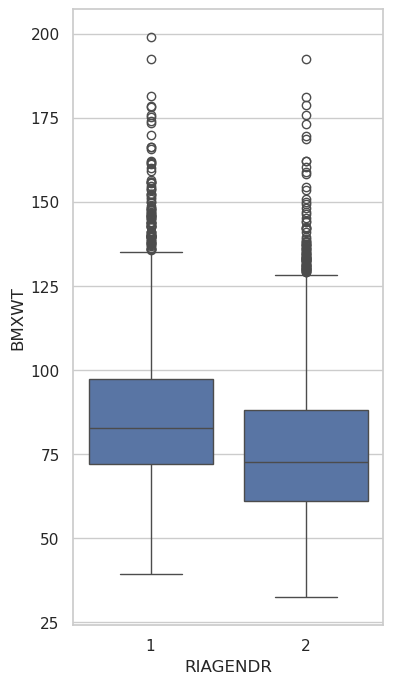

In [34]:
plt.figure(figsize=(4, 8))
sns.set_style("whitegrid")

sns.boxplot(x = "RIAGENDR", y = "BMXWT", data=df)
plt.show()

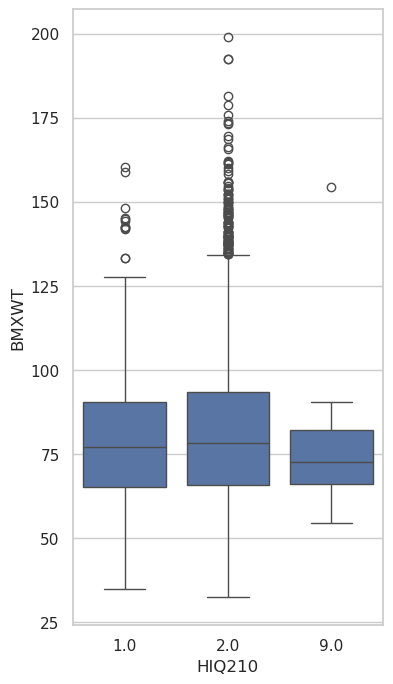

In [37]:
plt.figure(figsize=(4, 8))
sns.set_style("whitegrid") 

ax = sns.boxplot(x = "HIQ210", y = "BMXWT", data=df)